In [1]:
from spam import SPAM_Experiment

from selene_sim import DepolarizingErrorModel, Stim, Quest

In [2]:
# select parameters and build experiment

n_qubits = 16
rounds = 5
filename = 'exp_spam_example.py'

exp = SPAM_Experiment(n_qubits, rounds=rounds, filename=filename)
exp.add_settings()

Having setup our SPAM experiment, we can now either simulate using a local simulator or submit to hardware or emulator backend.

### Run local simulation using Selene

In [3]:
# setup error model

error_model = DepolarizingErrorModel(
    #random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    # two qubit gate error rate
    p_2q=7e-4,
    # set state preparation and measurement error rates to 0
    p_meas=1.5e-3,
    p_init=0,
)

In [4]:
shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/10 circuits complete
2/10 circuits complete
3/10 circuits complete
4/10 circuits complete
5/10 circuits complete
6/10 circuits complete
7/10 circuits complete
8/10 circuits complete
9/10 circuits complete
10/10 circuits complete


### Submit to Quantinuum Hardware or Emulator using Nexus

In [ ]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='spam-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

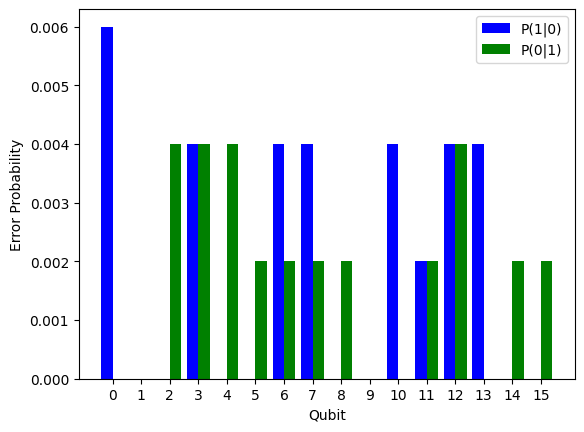

Average SPAM Errors:
prob(1|0) = 0.002 +/- 0.0005
prob(0|1) = 0.00187 +/- 0.00048


In [7]:
# analyze results

exp.analyze_results()

In [ ]:
# save experiment object to working directory

exp.save()